In [1]:
import json
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import squarify # pip install squarify


In [3]:
rhAll=pd.read_csv('ratingHistory_3March2021.csv')

In [4]:
rhAll

,Unnamed: 0,Unnamed: 0.1,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating
0,0,0,2,Codeforces Beta Round #2,tourist,14,1267124400,0,1602
1,1,1,8,Codeforces Beta Round #8,tourist,5,1270748700,1602,1764
2,2,2,10,Codeforces Beta Round #10,tourist,18,1271353500,1764,1878
3,3,3,13,Codeforces Beta Round #13,tourist,11,1273161600,1878,1967
4,4,4,19,Codeforces Beta Round #19,tourist,2,1277398800,1967,2063
...,...,...,...,...,...,...,...,...,...
3858990,3858990,13948,1105,Codeforces Round #533 (Div. 2),__123456__,5238,1547993100,-37,-35
3858991,3858991,13949,1118,Codeforces Round #540 (Div. 3),__123456__,5192,1550595000,-35,-41
3858992,3858992,13950,1133,Codeforces Round #544 (Div. 3),__123456__,4040,1551978300,-41,-40
3858993,3858993,13951,1141,Codeforces Round #547 (Div. 3),__123456__,5300,1553013300,-40,-43


In [5]:
rhAll.drop_duplicates(keep='last',subset=['contestId','handle'],inplace=True)

In [6]:
rhAll

,Unnamed: 0,Unnamed: 0.1,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating
0,0,0,2,Codeforces Beta Round #2,tourist,14,1267124400,0,1602
1,1,1,8,Codeforces Beta Round #8,tourist,5,1270748700,1602,1764
2,2,2,10,Codeforces Beta Round #10,tourist,18,1271353500,1764,1878
3,3,3,13,Codeforces Beta Round #13,tourist,11,1273161600,1878,1967
4,4,4,19,Codeforces Beta Round #19,tourist,2,1277398800,1967,2063
...,...,...,...,...,...,...,...,...,...
3858990,3858990,13948,1105,Codeforces Round #533 (Div. 2),__123456__,5238,1547993100,-37,-35
3858991,3858991,13949,1118,Codeforces Round #540 (Div. 3),__123456__,5192,1550595000,-35,-41
3858992,3858992,13950,1133,Codeforces Round #544 (Div. 3),__123456__,4040,1551978300,-41,-40
3858993,3858993,13951,1141,Codeforces Round #547 (Div. 3),__123456__,5300,1553013300,-40,-43


In [10]:
sMin=rhAll.groupby('handle')['newRating'].min()

In [11]:
sMax=rhAll.groupby('handle')['newRating'].max()

In [12]:
dfMin=sMin.to_frame(name="min")
dfMax=sMax.to_frame(name="max")
df1=pd.merge(dfMin,dfMax,left_index=True, right_index=True)

In [13]:
tour=rhAll.groupby('handle')['contestId'].count()

In [14]:
df1=pd.merge(df1,tour,left_index=True, right_index=True)
df1

,min,max,contestId
handle,,,
---,1406,1771,35
----,1512,1584,3
-----,1130,1490,10
---------,1645,2102,15
----------,1225,2320,117
...,...,...,...
zzzzzzzggggggg,1055,1420,6
zzzzzzzhh,366,366,1
zzzzzzzx,382,618,2


In [15]:
df1[df1['contestId']==1]

,min,max,contestId
handle,,,
----------------------,1370,1370,1
-----_...--,1539,1539,1
----__-__--_,573,573,1
----o,377,377,1
---DeMoN---,1413,1413,1
...,...,...,...
zzzvazzz,1372,1372,1
zzzzcccc,1418,1418,1
zzzzeno,1357,1357,1


In [16]:
df1.describe()

,min,max,contestId
count,324234.000000,324234.000000,324234.000000
mean,1109.798312,1380.812617,11.621511
std,398.906499,382.943557,19.916571
min,-89.000000,353.000000,1.000000
25%,926.000000,1371.000000,1.000000
50%,1259.000000,1411.000000,4.000000
75%,1394.000000,1520.000000,12.000000
max,1978.000000,3783.000000,682.000000


In [17]:
df2=df1[df1['contestId']>12]
df2.describe()

,min,max,contestId
count,81016.000000,81016.000000,81016.000000
mean,1090.033450,1619.774822,35.402464
std,333.060603,309.775469,28.373817
min,-89.000000,747.000000,13.000000
25%,931.000000,1406.000000,17.000000
50%,1155.000000,1554.000000,26.000000
75%,1327.000000,1780.000000,42.000000
max,1952.000000,3783.000000,682.000000


In [18]:
df3=df1[df1['contestId']>42]
df3.describe()

,min,max,contestId
count,20235.000000,20235.000000,20235.000000
mean,1134.013442,1773.816407,72.771040
std,262.073135,331.948856,34.125282
min,-43.000000,817.000000,43.000000
25%,993.000000,1505.500000,50.000000
50%,1164.000000,1719.000000,62.000000
75%,1312.000000,1975.000000,83.000000
max,1873.000000,3783.000000,682.000000


In [19]:
df4=df1[df1['contestId']>83]
df4.describe()

,min,max,contestId
count,4957.000000,4957.000000,4957.000000
mean,1138.681461,1902.127698,119.212427
std,242.052376,360.744674,38.883462
min,-43.000000,1361.000000,84.000000
25%,996.000000,1641.000000,93.000000
50%,1157.000000,1860.000000,107.000000
75%,1298.000000,2118.000000,133.000000
max,1873.000000,3783.000000,682.000000


In [20]:
df1.groupby('contestId').count().head(12)

,min,max
contestId,,
1,81918,81918
2,39805,39805
3,26369,26369
4,19834,19834
5,15681,15681
6,13228,13228
7,11060,11060
8,8975,8975
9,7884,7884


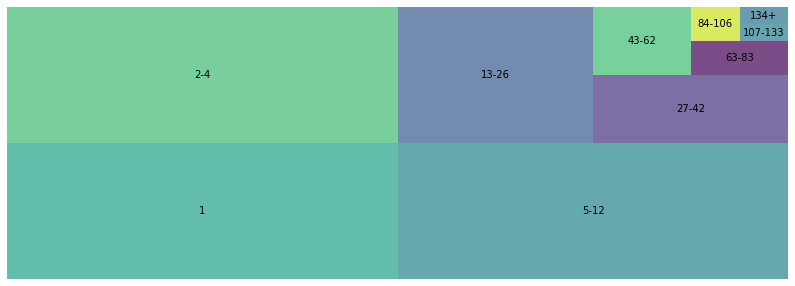

In [24]:
sizes=[64,64,64,32,16,8,4,2,1,1]
label=["1", "2-4", "5-12", "13-26","27-42","43-62","63-83","84-106","107-133","134+"]
fig, ax = plt.subplots(1, figsize = (14,5))
squarify.plot(sizes=sizes, 
              label=label, 
              alpha=.7 )
plt.axis('off')
plt.show()